# Анализ имён

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline
import os

In [84]:
PATH = 'babynames/'
df = pd.DataFrame(columns=['name','sex','num','year'])
for filename in os.listdir(PATH):
    with open(PATH + filename, 'r') as f:
        df_t = pd.read_csv(f, names = ['name','sex','num'])
        df_t['year'] = int(filename[3:7])
        df = df.append(df_t)

In [85]:
df.head()

,name,sex,num,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

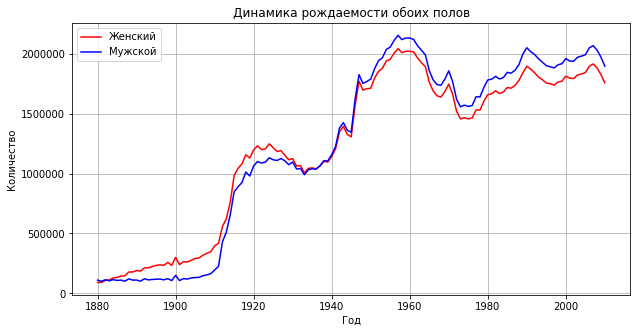

In [86]:
table = df.pivot_table(index='year', values='num', columns='sex', aggfunc=sum)
table['F'].plot(figsize=(10, 5), legend=True, label='Женский', color='red')
table['M'].plot(figsize=(10, 5), legend=True, label='Мужской', color='blue')
plt.ylabel('Количество');
plt.xlabel('Год');
plt.title('Динамика рождаемости обоих полов')
plt.grid(True)

## Найдите самые популярные имена за всю историю

In [87]:
names_num = df.pivot_table(index='name', values='num', aggfunc=sum)

### cамые популярные имена:

In [88]:
names_num.sort_values('num', ascending=False).head(15)

,num
name,
James,5072771
John,5061897
Robert,4788050
Michael,4265373
Mary,4119074
William,4002392
David,3538748
Richard,2552269
Joseph,2529809


## Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

1880 - 1893	мужское:John	женское:Mary
1893 - 1906	мужское:John	женское:Mary
1906 - 1919	мужское:John	женское:Mary
1919 - 1932	мужское:Robert	женское:Mary
1932 - 1945	мужское:Robert	женское:Mary
1945 - 1958	мужское:James	женское:Mary
1958 - 1971	мужское:Michael	женское:Lisa
1971 - 1984	мужское:Michael	женское:Jennifer
1984 - 1997	мужское:Michael	женское:Jessica
1997 - 2010	мужское:Jacob	женское:Emily


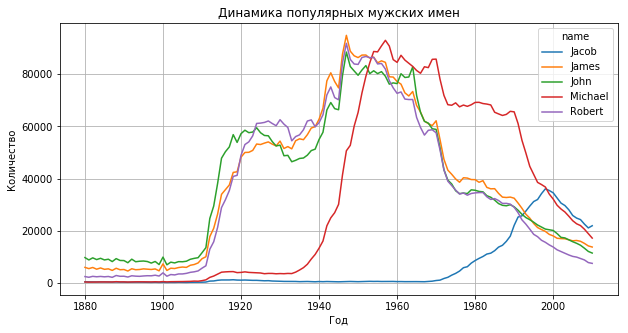

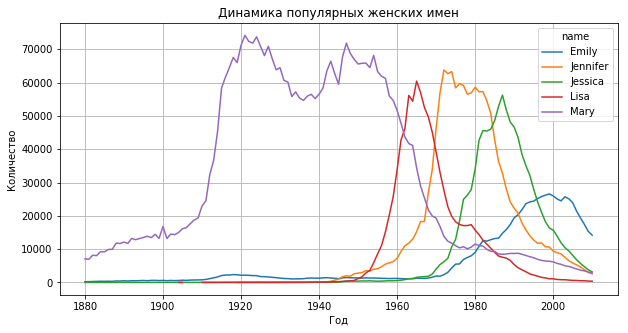

In [142]:
males = []
females = []

count = df['year'].value_counts().count()//10
for i in range(10):
    year_from = 1880+i*count
    year_to = 1880+i*count+count
    male_df = df[(df['sex']=='M') & (df['year'].between(year_from, year_to, inclusive=True))]\
                .pivot_table(index='name', values='num', aggfunc=sum)\
                .sort_values('num', ascending=False).head(1).reset_index()['name'][0]
    female_df = df[(df['sex']=='F') & (df['year'].between(year_from, year_to, inclusive=True))]\
                .pivot_table(index='name', values='num', aggfunc=sum)\
                .sort_values('num', ascending=False).head(1).reset_index()['name'][0]
    males.append(male_df)
    females.append(female_df)
    print('{0} - {1}\tмужское:{2}\tженское:{3}'.format(year_from, year_to, male_df, female_df))
df[(df['name'].isin(males))]\
    .pivot_table('num', index='year', columns='name', aggfunc=sum) \
    .plot(figsize=(10, 5), legend=True)
plt.ylabel('Количество')
plt.xlabel('Год')
plt.title('Динамика популярных мужских имен')
plt.grid(True)
df[(df['name'].isin(females))]\
    .pivot_table('num', index='year', columns='name', aggfunc=sum) \
    .plot(figsize=(10, 5), legend=True);
plt.ylabel('Количество')
plt.xlabel('Год')
plt.title('Динамика популярных женских имен')
plt.grid(True)

## Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

Text(0.5,1,'Разнообразие имен за каждый год')

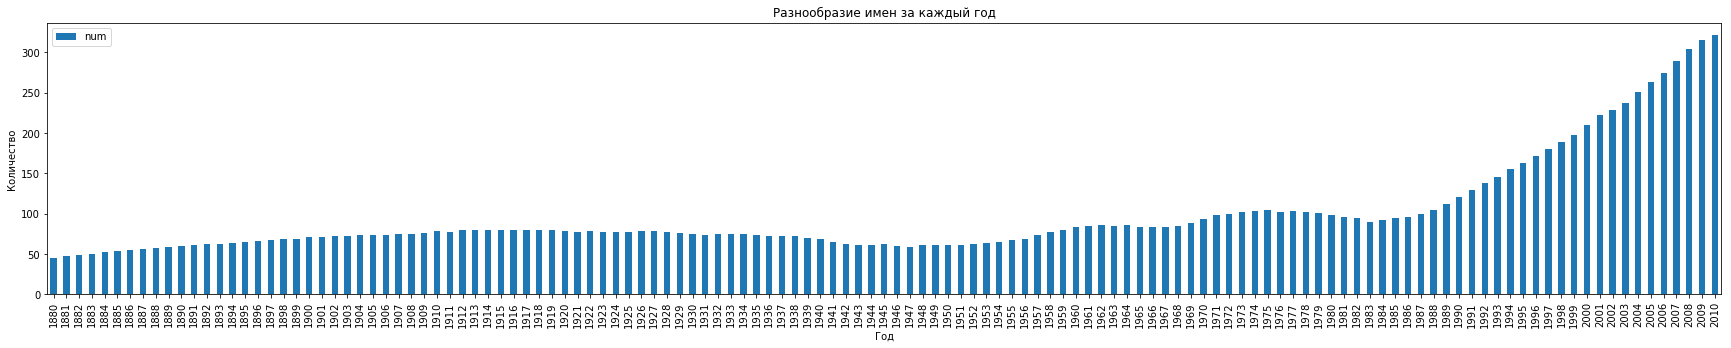

In [187]:
df1 = df.copy()
df1 = df1.groupby(['year']).apply(lambda x: x['num']/x['num'].sum())
df1 = df1.groupby(['year']).apply(lambda x: x.sort_values(ascending=False).cumsum().values.searchsorted(0.5))
df2 = df1.to_frame()
df2.reset_index(inplace=True)
df2.columns = ['year','num']
df2.pivot_table(index='year', values='num', aggfunc=sum).plot.bar(figsize=(30, 5), legend=True)
plt.ylabel('Количество')
plt.xlabel('Год')
plt.title('Разнообразие имен за каждый год')
